# Versuch 241 RLC Glieder - Auswertung
#### Felix Fleischle - 9.3.2022 und 11.3.2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#%matplotlib qt5

### 1. Bestimmung der Zeitkonstante

In [2]:
C_1 = np.array([470, 4.7, 47]) * 10**(-9) #F
C_1_err = 0.1 * C_1

R_1 = np.array([1000, 10000, 1000]) #Ohm
R_1_err = 0.05 * R_1

f_1 = np.array([150, 500, 500]) #Hz

T_h_1 = np.array([360, 32, 32]) * 10**(-6) #s
T_h_1_err = np.array([10, 0.1, 0.1]) * 10**(-6) #s

In [3]:
tau_1_exp = T_h_1/np.log(2)
tau_1_exp_err = T_h_1_err /np.log(2)

print("Tau exp:", tau_1_exp * 10**6, "+-", tau_1_exp_err * 10**6, "[10^(-6)s]")

tau_1_theo = C_1 * R_1
tau_1_theo_err = np.sqrt((C_1_err * R_1)**2 + (C_1 * R_1_err)**2)
print("Tau theo:", tau_1_theo * 10**6, "+-", tau_1_theo_err * 10**6, "[10^(-6)s]")

sigma_tau_1 = np.abs((tau_1_exp - tau_1_theo)/(np.sqrt(tau_1_exp_err**2 + tau_1_theo_err**2)))
print("Abweichung:", sigma_tau_1)

Tau exp: [519.37021472  46.16624131  46.16624131] +- [14.42695041  0.1442695   0.1442695 ] [10^(-6)s]
Tau theo: [470.  47.  47.] +- [52.54759747  5.25475975  5.25475975] [10^(-6)s]
Abweichung: [0.90600714 0.15860756 0.15860756]


### 3. Frequenzgang und Phasengang des RC-Glieds

In [4]:
# Phase
f_3 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) * 10**3 #Hz
dt_3 = np.array([207, 81, 47, 28, 21, 13.6, 9.6, 9.0, 6.8, 5.0]) * 10**(-6) #s
dt_3_err = np.array([5, 3, 3, 3, 3, 1.0, 0.7, 0.6, 0.5, 0.5]) * 10**(-6) #s
phi_3 = 360 * f_3 * dt_3
phi_3_err = 360 * f_3 * dt_3_err
print("Phase:", phi_3, "+-", phi_3_err)

x_3 = np.linspace(0, 10000, 20000)

def expfunc(x,A,mu,b):
    return A*np.exp(-mu*x)+b

popt_3, pcov_3 = curve_fit(expfunc, f_3, phi_3, sigma=phi_3_err, p0=[75, 0.00024, 10])

Phase: [74.52  58.32  50.76  40.32  37.8   29.376 24.192 25.92  22.032 18.   ] +- [1.8   2.16  3.24  4.32  5.4   2.16  1.764 1.728 1.62  1.8  ]


Text(2000, 24, 'b = 15.0$\\pm$7.0')

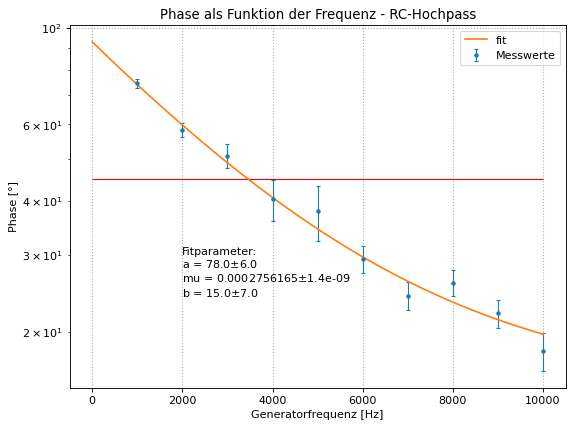

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f_3,phi_3, yerr = phi_3_err, linestyle='None', marker = ".", label="Messwerte", capsize = 2, elinewidth=1)
plt.plot(x_3, expfunc(x_3, *popt_3), label="fit")
plt.hlines(45,0,10000, color="red", linewidth=1)
plt.xlabel('Generatorfrequenz [Hz]')
plt.ylabel('Phase [°]')
plt.title('Phase als Funktion der Frequenz - RC-Hochpass')
plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.text(2000, 30, 'Fitparameter:')
plt.text(2000, 28, 'a = ' + str(np.round(popt_3[0],0)) + '$\pm$' + str(np.round(pcov_3[0,0],0)))
plt.text(2000, 26, 'mu = ' + str(np.round(popt_3[1],10)) + '$\pm$' + str(np.round(pcov_3[1,1],10)))
plt.text(2000, 24, 'b = ' + str(np.round(popt_3[2],0)) + '$\pm$' + str(np.round(pcov_3[2,2],0)))

In [56]:
f_45 = -(np.log((45-popt_3[2])/popt_3[0]) / popt_3[1])
A_3 = popt_3[0]
A_3_err = np.sqrt(pcov_3[0,0])
mu_3 = popt_3[1]
mu_3_err = np.sqrt(pcov_3[1,1])
b_3 = popt_3[2]
b_3_err = np.sqrt(pcov_3[2,2])
f_45_err = np.sqrt( ( np.log((45-b_3)/A_3) * mu_3_err/(mu_3)**2 )**2 + ( b_3_err/(mu_3*(45-b_3)) )**2 + ( A_3_err/(mu_3*A_3) )**2 )
print("Grenzfrequenz:", f_45, "+-", f_45_err, "[Hz]")

#Theoretische Grenzfrequenz
f_g_theo = 1/(2*np.pi*tau_1_theo[2])
f_g_theo_err = tau_1_theo_err[2]/(2*np.pi*(tau_1_theo[2])**2)
print("Theoretische Grenzfrequenz:", f_g_theo, "+-", f_g_theo_err, "[Hz]")

sigma_hp_phase = (f_45 - f_g_theo)/np.sqrt(f_45_err**2 + f_g_theo_err**2)
print("Abweichung von durch Phase bestimmter Grenzfrequenz:", sigma_hp_phase)

# Vergleich der Werte die durch Gerade im Diagramm bestimmt wurden:
f_g_hp = 3.12*10**3
f_g_hp_err = 0.08*10**3
f_g_tp = 3.08*10**3
f_g_tp_err = 0.08*10**3

sigma_hp_phaseexp = np.abs((f_45 - f_g_hp)/np.sqrt(f_45_err**2 + f_g_hp_err**2))
print("Abweichung von durch Phase bestimmer Grenzfrequenz zu experimentellem Wert:", sigma_hp_phaseexp)

sigma_hp_theo = np.abs((f_g_hp - f_g_theo)/np.sqrt(f_g_hp_err**2 + f_g_theo_err**2))
print("Abweichung Hochpass exp und theo:", sigma_hp_theo)

sigma_tp_theo = np.abs((f_g_tp - f_g_theo)/np.sqrt(f_g_tp_err**2 + f_g_theo_err**2))
print("Abweichung Tiefpass exp und theo:", sigma_tp_theo)

Grenzfrequenz: 3444.499785024824 +- 585.9823614628776 [Hz]
Theoretische Grenzfrequenz: 3386.275384933943 +- 378.5970975623282 [Hz]
Abweichung von durch Phase bestimmter Grenzfrequenz: 0.08345827449688839
Abweichung von durch Phase bestimmer Grenzfrequenz zu experimentellem Wert: 0.5486808808729521
Abweichung Hochpass exp und theo: 0.6881264512699041
Abweichung Tiefpass exp und theo: 0.7914970953781628


### Frequenzgang eines Serienschwingkreises

In [25]:
# Induktivität der Spule
R_4 = np.array([1000, 220, 47])
R_4_err = 0.05 * R_4
f_R_4 = np.array([4.02, 3.84, 3.75]) * 10**(3) #Hz
f_R_4_err = np.array([0.08, 0.08, 0.08]) * 10**(3) #Hz
df_4 = np.array([3.86, 1.38, 0.56]) * 10**(3) #Hz
df_4_err =np.array([0.20, 0.20, 0.10]) * 10**(3) #Hz
U_in_4 = np.array([0.91, 0.87, 0.97]) #V
U_in_4_err = np.array([0.03, 0.03, 0.03]) #V
U_out_4 = np.array([0.89, 0.71, 0.34])
U_out_4_err = np.array([0.03, 0.03, 0.03]) #V
C_4 = 47*10**(-9) #F
C_4_err = 0.1 * C_4

In [26]:
L_4 = 1/(f_R_4**2 *4*np.pi**2 * C_4)
L_4_err = np.sqrt( (2*f_R_4_err/(f_R_4**3 *4*np.pi**2 *C_4))**2 + (C_4_err/(f_R_4**2 *4*np.pi**2 *(C_4**2)))**2 )
print("Induktivität L1:", L_4, "+-", L_4_err, "[H]")

L_4_mean = np.mean(L_4)
L_4_err_mean = np.mean(L_4_err)
L_4_mean_err = np.sqrt( (L_4_err_mean)**2 + (np.std(L_4)/np.sqrt(3))**2 )
print("L1 Mittelwert:", L_4_mean, "+-", L_4_mean_err, "[H]")

Induktivität L1: [0.03334957 0.03654938 0.0383248 ] +- [0.0035894  0.00395952 0.00416674] [H]
L1 Mittelwert: 0.03607458246459152 +- 0.004082091302359131 [H]


In [27]:
# Gesamtwiderstand
R_ges_4 = L_4 * 2 * np.pi * df_4
R_ges_4_err = np.sqrt( (L_4_err * 2* np.pi * df_4)**2 + (L_4 * 2 * np.pi * df_4_err)**2 )
print("Gesamtwiderstand:", R_ges_4, "+-", R_ges_4_err, "[Ohm]")

R_v_4 = R_ges_4 - R_4
R_v_4_err = np.sqrt(R_ges_4_err**2 + R_4_err**2)
print("Verlustwiderstand:", R_v_4, "+-", R_v_4_err, "[Ohm']")

Gesamtwiderstand: [808.83041174 316.91216574 134.84901088] +- [96.61632479 57.34280386 28.19221663] [Ohm]
Verlustwiderstand: [-191.16958826   96.91216574   87.84901088] +- [108.7874727   58.38833063  28.28999078] [Ohm']


In [29]:
# Berechnung Verlustwiderstand aus Kirchhoff
R_v_K = (R_4 * U_in_4 / U_out_4) - R_4
R_v_K_err = np.sqrt( (R_4_err * U_in_4 / U_out_4 - R_4_err)**2 + (R_4 * U_in_4_err / U_out_4)**2 + (R_4 * U_in_4 * U_out_4_err / (U_out_4)**2)**2 )
print("Verlustwiderstand Kirchhoff:", R_v_K, "+-", R_v_K_err, "[Ohm]")

sigma_R_v = np.abs((R_v_K - R_v_4)/np.sqrt(R_v_K_err**2 + R_v_4_err**2) )
print("Abweichung:", sigma_R_v)

Verlustwiderstand Kirchhoff: [22.47191011 49.57746479 87.08823529] +- [48.22180696 14.90979347 13.27173728] [Ohm]
Abweichung: [1.7953665  0.78548278 0.02434606]


### Bestimmung der Dämpfungskonstanten eines freien, gedämpften Schwingkreises

In [44]:
f_5 = 150 #Hz
A_5 = np.array([4.13, 2.72, 1.66, 0.91, 0.44])
A_5_err = np.array([0.10, 0.10, 0.05, 0.05, 0.05])
T_5 = 0.25 * 10**(-3) #s
T_5_err = 0.04 * 10**(-3)

A_5_rel = np.array([])
A_5_rel_err = np.array([])
for i in range(4):
    A_5_rel = np.append( A_5_rel, (A_5[i]/A_5[(i+1)]))
    A_5_rel_err = np.append( A_5_rel_err, np.sqrt((A_5_err[i]/A_5[i+1])**2 + (A_5_err[i+1]*A_5[i]/(A_5[i+1]**2))**2) )
print("Brüche:",A_5_rel,"+-",A_5_rel_err)
Lambda = np.log(A_5_rel)
Lambda_err = A_5_rel_err/A_5_rel
print("Log Dekrement:", Lambda, "+-", Lambda_err)
Lambda_mean = np.mean(Lambda)
Lambda_err_mean = np.mean(Lambda_err)
Lambda_mean_err = np.sqrt(Lambda_err_mean**2 + np.std(Lambda)/np.sqrt(4))
print("Mittelwert Lambda:", Lambda_mean, "+-", Lambda_mean_err)

Brüche: [1.51838235 1.63855422 1.82417582 2.06818182] +- [0.06684189 0.0778768  0.11430179 0.26105159]
Log Dekrement: [0.41764553 0.49381428 0.60112828 0.72666987] +- [0.04402177 0.04752775 0.06265942 0.12622275]
Mittelwert Lambda: 0.5598144897606929 +- 0.251141425036483


In [45]:
#L_5 = 1/(f_R_5**2 *4*np.pi**2 * C_5)
#L_5_err = np.sqrt( (2*f_R_5_err/(f_R_5**3 *4*np.pi**2 *C_5))**2 + (C_5_err/(f_R_5**2 *4*np.pi**2 *(C_5**2)))**2 )
#print("Induktivität L1:", L_5, "+-", L_5_err, "[H]")

In [49]:
# Gesamtwiderstand:
R_ges_5 = 2 * Lambda_mean * L_4[2] / T_5
R_ges_5_err = np.sqrt((Lambda_mean_err / Lambda_mean)**2 + (L_4_err[2]/L_4[2])**2 + (T_5_err / T_5)**2 ) * R_ges_5

print("Gesamtwiderstand:", R_ges_5, "+-", R_ges_5_err, "[Ohm]")

sigma_R_ges_45 = np.abs((R_ges_5 - R_ges_4[2])/np.sqrt(R_ges_4_err[2]**2 + R_ges_5_err**2))
print("Abweichung:", sigma_R_ges_45)

#delta_5 = R_ges_5 / (2*L_4[2])
#delta_5_err = np.sqrt((R_ges_5_err / R_ges_5)**2 + (L_4_err[2]/L_4[2])**2) * delta_5
#print("Dämpfungskonstante:", delta_5, "+-", delta_5_err, "[Hz]")

Gesamtwiderstand: 171.63821608755677 +- 83.8529997723032 [Ohm]
Abweichung: 0.41585982792189835


### Resonanzüberhöhung und Bandsperre

In [55]:
f_R_67 = np.array([4.07, 3.98, 4.21, 4.11]) * 10**(3) #Hz
f_R_67_err = np.array([0.03, 0.03, 0.03, 0.03]) * 10**3
C_67 = 47 * 10**(-9)
C_67_err = 0.1 * C_67
L_67 = L_4_mean
L_67_err = L_4_mean_err
R_67 = np.array([220, 220, 220, 1000])
R_67_err = 0.05 * R_67

omega_R_67_theo = 1/(np.sqrt(L_67*C_67))
omega_R_67_theo_err = np.sqrt( (L_67_err * C_67/(2*(np.sqrt(L_67*C_67))**3))**2 + (L_67 * C_67_err/(2*(np.sqrt(L_67*C_67))**3))**2 )
print("Resonanzkreisfrequenz Widerstand:", omega_R_67_theo, "+-", omega_R_67_theo_err, "[1/s]")

delta_6 = R_67[0]/(2*L_67)
delta_6_err = np.sqrt((R_67_err[0]/R_67[0])**2 + (L_67_err / L_67)**2)*delta_6
print("Dämpfungskonstante Teil 6:", delta_6, "+-", delta_6_err, "[Hz]")

omega_C_67_theo = np.sqrt(omega_R_67_theo**2 - 2*delta_6**2)
omega_C_67_theo_err = np.sqrt(((omega_R_67_theo_err * omega_R_67_theo)/np.sqrt(omega_R_67_theo**2 - 2*delta_6**2))**2 + ((2*delta_6_err * delta_6)/np.sqrt(omega_R_67_theo**2 - 2*delta_6**2))**2 )
print("Resonanzkreisfrequenz Kondensator:", omega_C_67_theo, "+-", omega_C_67_theo_err, "[1/s]")

omega_L_67_theo = np.sqrt(omega_R_67_theo**2 + 2*delta_6**2)
omega_L_67_theo_err = np.sqrt(((omega_R_67_theo_err * omega_R_67_theo)/np.sqrt(omega_R_67_theo**2 + 2*delta_6**2))**2 + ((2*delta_6_err * delta_6)/np.sqrt(omega_R_67_theo**2 + 2*delta_6**2))**2 )
print("Resonanzkreisfrequenz Kondensator:", omega_L_67_theo, "+-", omega_L_67_theo_err, "[1/s]")

f_R_67_theo = 1/(2*np.pi) * np.array([omega_R_67_theo, omega_C_67_theo, omega_L_67_theo, omega_R_67_theo])
f_R_67_theo_err = 1/(2*np.pi) * np.array([omega_R_67_theo_err, omega_C_67_theo_err, omega_L_67_theo_err, omega_R_67_theo_err])
print("Theoretische Resonanzfrequenzen:", f_R_67_theo, "+-", f_R_67_theo_err, "[Hz]")

sigma_f_67 = np.abs((f_R_67 - f_R_67_theo)/np.sqrt(f_R_67_err**2 + f_R_67_theo**2))
print("Abweichungen:", sigma_f_67)

Resonanzkreisfrequenz Widerstand: 24285.688175725354 +- 1833.7103906168916 [1/s]
Dämpfungskonstante Teil 6: 3049.238341371488 +- 377.2254793676007 [Hz]
Resonanzkreisfrequenz Kondensator: 23899.76864414353 +- 1865.8046426534536 [1/s]
Resonanzkreisfrequenz Kondensator: 24665.570317621812 +- 1807.8762712706616 [1/s]
Theoretische Resonanzfrequenzen: [3865.18731956 3803.76631847 3925.64744023 3865.18731956] +- [291.84407287 296.95203172 287.73244507 291.84407287] [Hz]
Abweichungen: [0.05298747 0.04632992 0.07243245 0.06333595]
